# Ecuaciones¶
Las ecuaciones de Lotka-Volterra son un modelo biomatemático que pretende responder a estas cuestiones prediciendo la dinámica de las poblaciones de presa y depredador bajo una serie de hipótesis:

El ecosistema está aislado: no hay migración, no hay otras especies presentes, no hay plagas...
La población de presas en ausencia de depredadores crece de manera exponencial: la velocidad de reproducción es proporcional al número de individuos. Las presas sólo mueren cuando son cazadas por el depredador.
La población de depredadores en ausencia de presas decrece de manera exponencial.
La población de depredadores afecta a la de presas haciéndola decrecer de forma proporcional al número de presas y depredadores (esto es como decir de forma proporcional al número de posibles encuentros entre presa y depredador).
La población de presas afecta a la de depredadores también de manera proporcional al número de encuentros, pero con distinta constante de proporcionalidad (dependerá de cuanto sacien su hambre los depredadores al encontrar una presa).
Se trata de un sistema de dos ecuaciones diferenciales de primer orden, acopladas, autónomas y no lineales:

$$ \frac{dx}{dt} = \alpha x - \beta x y $$$$ \frac{dy}{dt} = -\gamma y + \delta y x $$
donde x es el número de presas (cebras en nuestro caso) e y es el número de depredadores (leones). Los parámetros son constantes positivas que representan:

$\alpha$: tasa de crecimiento de las presas.
$\beta$: éxito en la caza del depredador.
$\gamma$: tasa de decrecimiento de los depredadores.
$\delta$: éxito en la caza y cuánto alimenta cazar una presa al depredador.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib inline

Definimos la función que representará el sistema de ecuaciones en forma canónica para pasárselo a odeint:

In [3]:

def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])

Definimos los parámetros de nuestro problema, las condiciones iniciales y el tiempo final de la integración así como el número de pasos.

In [4]:
#c>a, c>b, c>d	: b>a, b>d  : a=d
a = 0.01
b = 0.2
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

Resolvemos la ecuación:

In [5]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

y representamos los resultados en función del tiempo:

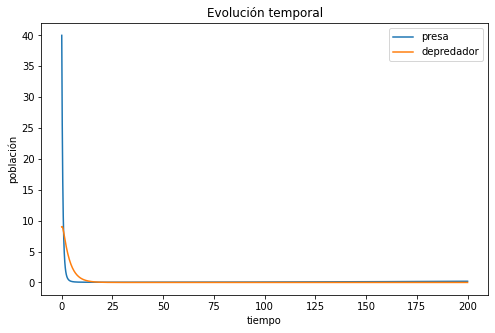

In [6]:
plt.figure("Evolución temporal", figsize=(8,5))
plt.title("Evolución temporal")
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')
plt.xlabel('tiempo')
plt.ylabel('población')
plt.legend()
plt.savefig('evolucion_temporal.png')

Otra forma interesante de visualizar estos datos es ver el número de presas en función del número de depredadores en lugar de a lo largo del tiempo, es decir, podemos visualizar su mapa de fases:

In [7]:
plt.figure("Presas vs depredadores", figsize=(8,5))
plt.plot(solucion[:, 0], solucion[:, 1])
plt.xlabel('presas')
plt.ylabel('depredadores')
#plt.savefig('presas_vs_depredadores.png')

Text(0, 0.5, 'depredadores')

Se trata de una solución periódica en la que, como decíamos al principio, un aumento en la población de cebras va seguido del aumento del número de leones. Un gran número de depredadores merma la población de presas y a los pobres leones les toca pasar hambre una temporada. Otra forma interesante de visualizar estos datos es ver el número de presas en función del número de depredadores, en lugar de a lo largo del tiempo, es decir, podemos visualizar su mapa de fases. Podemos pintar también el campo de direcciones de nuestras ecuaciones usando la función quiver. El tamaño de las flechas se ha normalizado para que todas tengan la misma longitud y se ha usado un colormap para representar el módulo.

In [8]:


plt.figure("Campo de direcciones", figsize=(8,5))
plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.plot(solucion[:, 0], solucion[:, 1])
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.savefig('campo_direcciones.png')

NameError: name 'xx' is not defined

<Figure size 576x360 with 0 Axes>

In [ ]:
n_max = np.max(solucion) * 1.10

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
#plt.savefig('campo_direcciones_ev_temporal.png')

Si nos fijamos en la línea azul, la coordenada x en cada punto indica el número de presas y la coordenada y el número de depredadores. La evolución a lo largo del tiempo que hemos representado antes, se obtiene al recorrer esta curva en sentido antihorario. Podemos ver también como el campo de direcciones nos señala la tendencia del sistema en cada situación. Por ejemplo, una flecha que apunta hacia arriba a la derecha indica que con ese número de cebras y leones en nuestra sabana, la tendencia será que aumenten ambos.

Llegados a este punto podemos preguntarnos qué habría ocurrido si el número inicial de cebras y leones hubiese sido otro. Como ya sabemos integrar ecuaciones diferenciales, bastaría con cambiar nuestra x0 e y0 y repetir el proceso (incluso podríamos hacer un widget interactivo). Sin embargo, se puede demostrar que a lo largo de las líneas del mapa de fases, como la que hemos pintado antes, se conserva la cantidad:

𝐶=𝛼ln𝑦−𝛽𝑦+𝛾ln𝑥−𝛿𝑥
 
Por tanto, pintando un contour de esta cantidad podemos obtener la solución para distintos valores iniciales del problema.

In [ ]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x

In [ ]:
x = np.linspace(0, x_max, 100)
y = np.linspace(0, y_max, 100)
xx, yy = np.meshgrid(x, y)
constant = C(xx, yy, a, b, c, d)

plt.figure('distintas_soluciones', figsize=(8,5))
plt.contour(xx, yy, constant, 50, cmap=plt.cm.Blues)
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.savefig('distintas_soluciones.png')

Vemos que estas curvas se van haciendo cada vez más y más pequeñas, hasta que, en nuestro caso, colapsarían en un punto en torno a  (30,5) . Se trata de un punto de equilibrio o punto crítico; si el sistema lo alcanzase, no evolucionaría y el número de cebras y leones sería constante en el tiempo. El otro punto crítico de nuestro sistema es el  (0,0) . Analizándolos matemáticamente se obtiene que:

El punto crítico situado en  (0,0)  es un punto de silla. Al tratarse de un punto de equilibrio inestable la extinción de cualquiera de las dos especies en el modelo sólo puede conseguirse imponiendo la condición inicial nula. El punto crítico situado en  (γ/δ,α/β)  es un centro (en este caso los autovalores de la matriz del sistema linealizado son ambos imaginarios puros, por lo que a priori no se conoce su estabilidad).

In [ ]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].scatter(c/d, a/b)
levels = (0.5, 0.6, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.775, 0.78, 0.781)
ax[0].contour(xx, yy, constant, levels, colors='blue', alpha=0.3)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
plt.savefig('distintas_soluciones_ev_temporal.png')